This Python code cell is performing an Exploratory Data Analysis (EDA) on a dataset. Here's a general breakdown:

1. **Import libraries**: Necessary libraries for data handling and visualization are imported.

2. **Load data**: The dataset 'final_merged_dataset.csv' is loaded into a DataFrame.

3. **Inspect data**: The structure of the DataFrame is inspected.

4. **Handle missing values**: Missing values are identified, visualized, and then imputed.

5. **Descriptive statistics**: Basic statistics for each column are calculated.

6. **Visualize distributions**: Histograms are created for each column.

7. **Outlier detection**: 

In [67]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import nltk

### LOADING DATA

In [68]:
# Load the data
data = pd.read_csv('../data/complete_merged.csv')
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   phone   5569 non-null   object 
 1   email   5569 non-null   object 
 2   name    5569 non-null   object 
 3   age     5569 non-null   float64
 4   v1      5572 non-null   object 
 5   v2      5572 non-null   object 
dtypes: float64(1), object(5)
memory usage: 261.3+ KB


In [69]:
# Renaming the columns
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,phone,email,name,age,Target,Text
0,298-598-3142,dcobleigh0@narod.ru,Debbie Cobleigh,79.0,ham,"Go until jurong point, crazy.. Available only ..."
1,580-220-1043,tghelardi1@purevolume.com,Thacher Ghelardi,30.0,ham,Ok lar... Joking wif u oni...
2,652-576-2335,mboxen2@shareasale.com,Mariquilla Boxen,72.0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,550-482-8459,mburgisi3@chron.com,Marcelle Burgisi,26.0,ham,U dun say so early hor... U c already then say...
4,820-694-9474,gdi4@myspace.com,Grange Di Lucia,24.0,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
# Quantifying Missingness
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missingness = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missingness)


        Missing Values  Percentage
phone                3    0.053841
email                3    0.053841
name                 3    0.053841
age                  3    0.053841
Target               0    0.000000
Text                 0    0.000000


In [71]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# For categorical data, you can fill with the most frequent value or a placeholder
categorical_columns = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Checking missingness after imputation
print(data.isnull().sum())

# Descriptive Statistics
print(data.describe().T)

phone     0
email     0
name      0
age       0
Target    0
Text      0
dtype: int64
      count       mean        std   min   25%   50%   75%   max
age  5572.0  51.337224  18.916441  16.0  36.0  51.0  66.0  90.0


DATA EXPLORATION

Text(0, 0.5, 'Number of Data points')

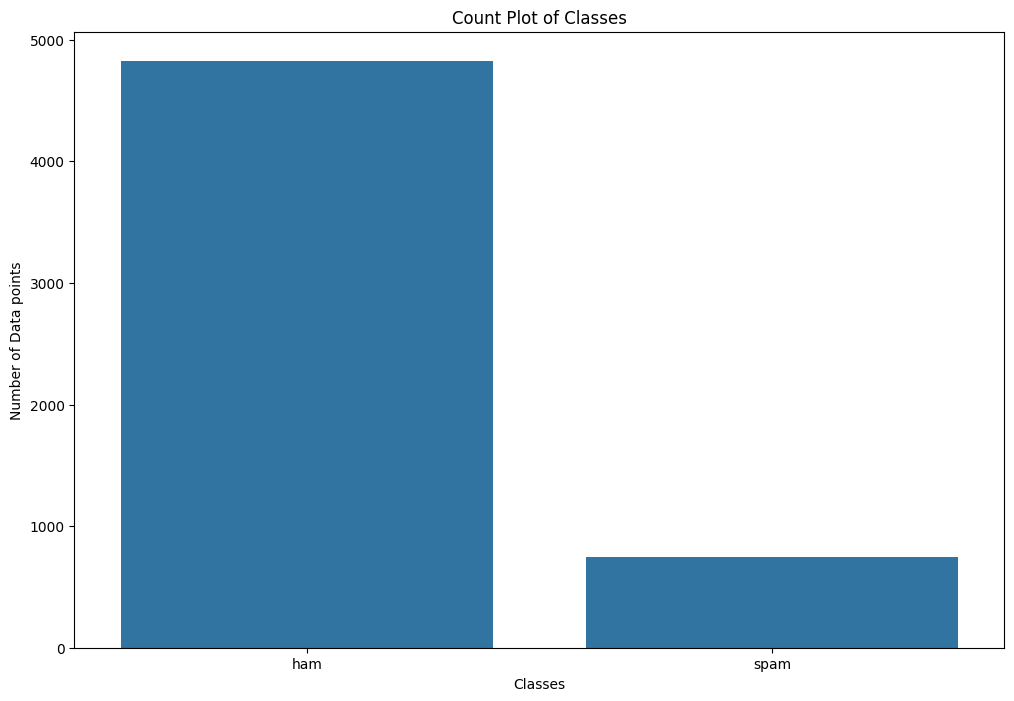

In [72]:
# Evaluate the target and find out if the dataset is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Target"])
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data points")

**Note:** From the above countplot the data imbalance is quite evident. 

FEATURE ENGINEERING

For the purpose of data exploration, and solving an NLP task, new features needs to be added

* No_Characters: Number of characters in the text message
* No_Words: Number of words in the text message
* No_sentence: Number of sentences in the text message  

In [73]:
# Adding a column of numbers of charachters, words and sentences in each msg
data["No_of_Characters"] = data["Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

data.describe().T

# Tokenised the words and sentences and used the length of the same. 

,count,mean,std,min,25%,50%,75%,max
age,5572.0,51.337224,18.916441,16.0,36.0,51.0,66.0,90.0
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Figure size 1200x800 with 0 Axes>

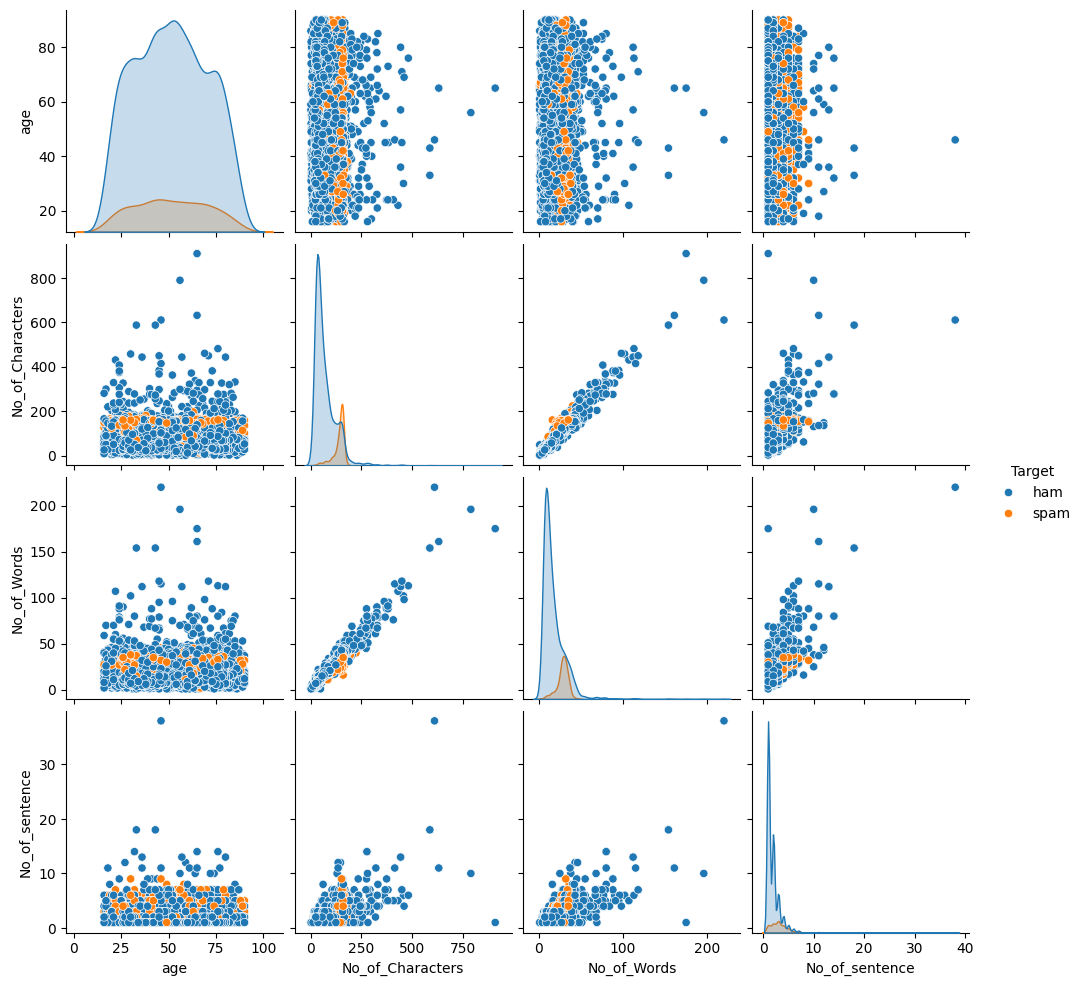

In [74]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target")
plt.show(fg)

### OUTLIER DETECTION

In [75]:
#Dropping the outliers. 
data = data[(data["No_of_Characters"]<350)]
data.shape

(5548, 9)

<Figure size 1200x800 with 0 Axes>

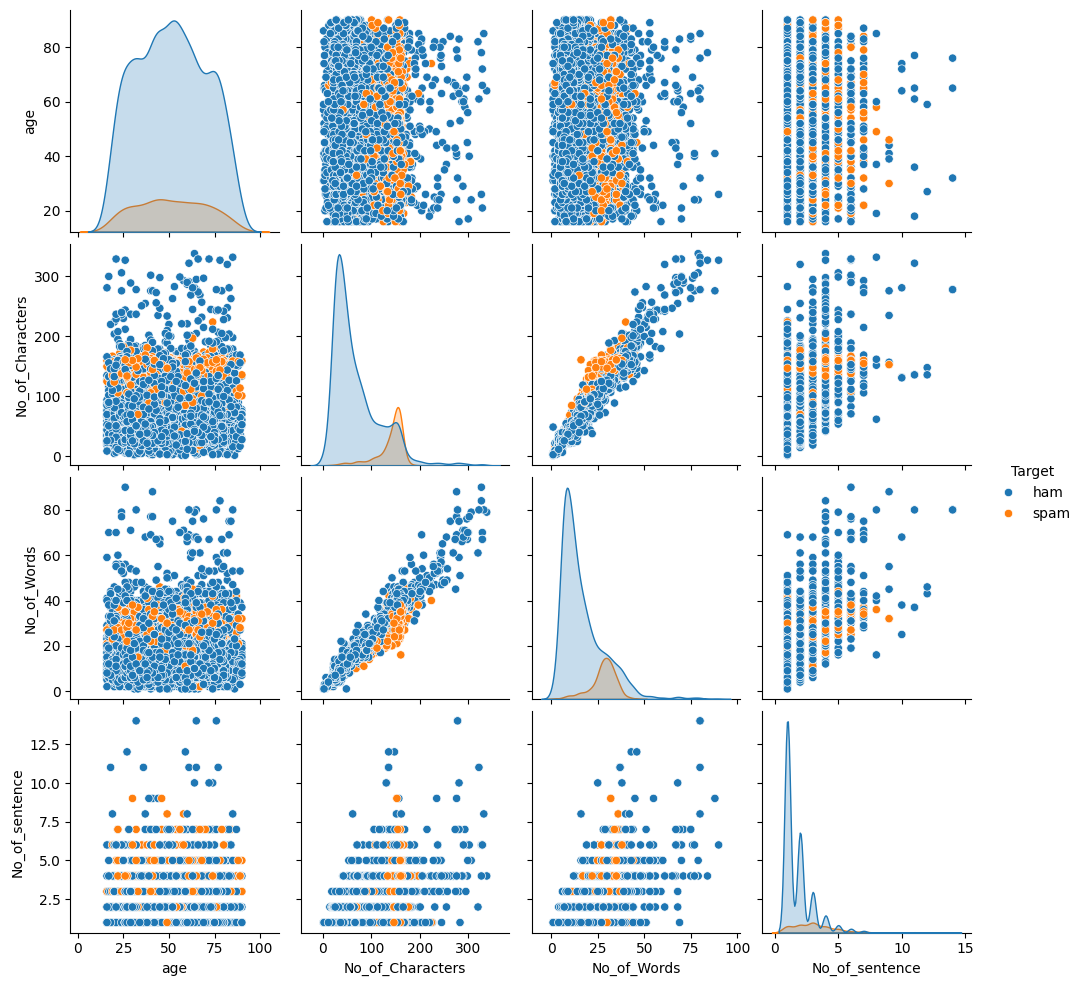

In [76]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target")
plt.show(fg)

In [77]:
data.to_csv('../data/feature_engineered.csv', index=False)